In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('KO', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,54.630001,52.029999,54.270000,52.759998,25611100.0,50.758961
2021-01-05,52.619999,52.029999,52.330002,52.180000,20323800.0,50.200962
2021-01-06,52.020000,50.189999,51.970001,50.520000,38724500.0,48.603920
2021-01-07,50.259998,49.520000,50.090000,49.959999,53225700.0,48.065155
2021-01-08,51.130001,49.840000,50.029999,51.080002,29674000.0,49.142685
...,...,...,...,...,...,...
2022-03-29,62.529999,61.740002,62.209999,62.160000,14720600.0,62.160000
2022-03-30,62.209999,61.560001,62.009998,62.209999,13641000.0,62.209999
2022-03-31,62.639999,62.000000,62.220001,62.000000,16822900.0,62.000000


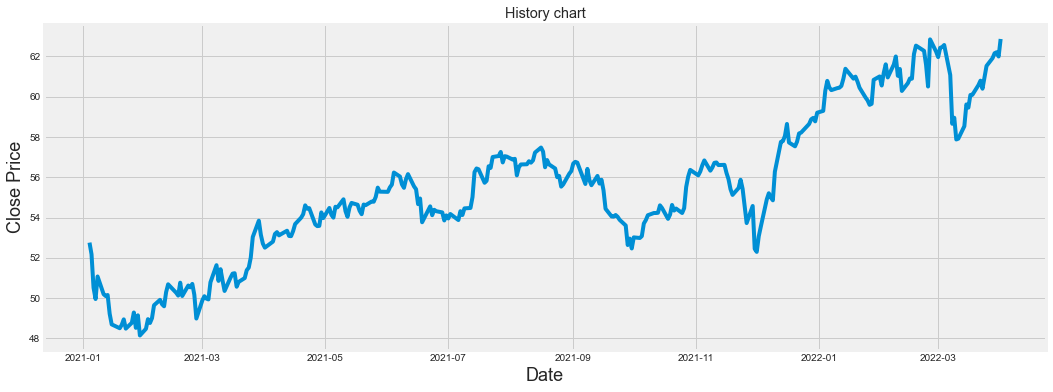

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.31317919],
       [0.27377714],
       [0.16100539],
       [0.12296181],
       [0.19904897],
       [0.13926628],
       [0.13315214],
       [0.13654882],
       [0.07336944],
       [0.03736409],
       [0.02445631],
       [0.03600536],
       [0.05434778],
       [0.02309784],
       [0.04279873],
       [0.07744562],
       [0.02581504],
       [0.06793479],
       [0.        ],
       [0.02241835],
       [0.05502702],
       [0.0421195 ],
       [0.05842371],
       [0.10190219],
       [0.12024436],
       [0.10529888],
       [0.09850524],
       [0.14605965],
       [0.17255418],
       [0.14402169],
       [0.13451086],
       [0.17798909],
       [0.13315214],
       [0.16847826],
       [0.16236412],
       [0.17391291],
       [0.13722806],
       [0.05706524],
       [0.11888589],
       [0.13247264],
       [0.12432054],
       [0.12160309],
       [0.17934782],
       [0.23709229],
       [0.18410323],
       [0.22350528],
       [0.18546196],
       [0.150

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.31317919, 0.27377714, 0.16100539, 0.12296181, 0.19904897,
       0.13926628, 0.13315214, 0.13654882, 0.07336944, 0.03736409,
       0.02445631, 0.03600536, 0.05434778, 0.02309784, 0.04279873,
       0.07744562, 0.02581504, 0.06793479, 0.        , 0.02241835,
       0.05502702, 0.0421195 , 0.05842371, 0.10190219, 0.12024436,
       0.10529888, 0.09850524, 0.14605965, 0.17255418, 0.14402169,
       0.13451086, 0.17798909, 0.13315214, 0.16847826, 0.16236412,
       0.17391291, 0.13722806, 0.05706524, 0.11888589, 0.13247264,
       0.12432054, 0.12160309, 0.17934782, 0.23709229, 0.18410323,
       0.22350528, 0.18546196, 0.15013583, 0.19565202, 0.2085598 ,
       0.20991853, 0.16440208, 0.18070654, 0.19361406, 0.22010859,
       0.22894019, 0.26290758, 0.3322011 , 0.38722812, 0.33967397])]
[0.30978249742987307]

[array([0.31317919, 0.27377714, 0.16100539, 0.12296181, 0.19904897,
       0.13926628, 0.13315214, 0.13654882, 0.07336944, 0.03736409,
       0.02445631, 0.03600536, 0.05

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 4s 144ms/step - loss: 0.3270
Epoch 2/256
2/2 [==============================] - 0s 138ms/step - loss: 0.0916
Epoch 3/256
2/2 [==============================] - 0s 137ms/step - loss: 0.0295
Epoch 4/256
2/2 [==============================] - 0s 149ms/step - loss: 0.0446
Epoch 5/256
2/2 [==============================] - 0s 143ms/step - loss: 0.0092
Epoch 6/256
2/2 [==============================] - 0s 139ms/step - loss: 0.0152
Epoch 7/256
2/2 [==============================] - 0s 143ms/step - loss: 0.0226
Epoch 8/256
2/2 [==============================] - 0s 137ms/step - loss: 0.0197
Epoch 9/256
2/2 [==============================] - 0s 133ms/step - loss: 0.0119
Epoch 10/256
2/2 [==============================] - 0s 135ms/step - loss: 0.0076
Epoch 11/256
2/2 [==============================] - 0s 134ms/step - loss: 0.0096
Epoch 12/256
2/2 [==============================] - 0s 137ms/step - loss: 0.0123
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.9823149105921846

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13564/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


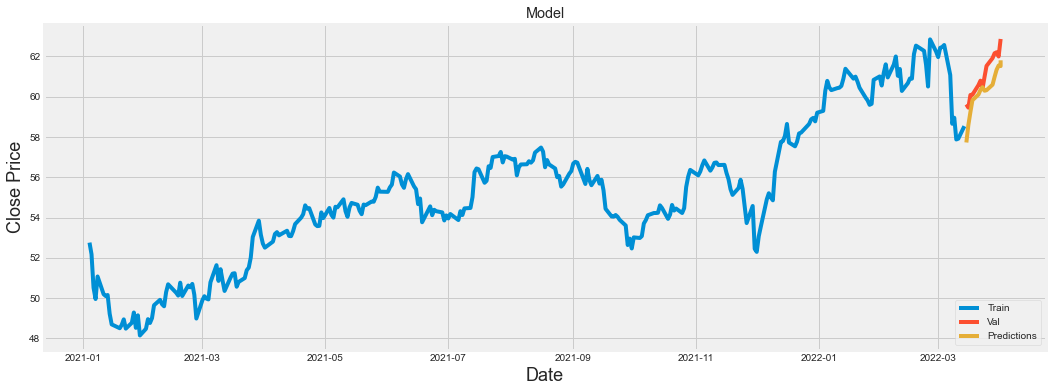

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,59.619999,57.730614
2022-03-16,59.459999,58.602531
2022-03-17,60.090000,59.236782
2022-03-18,60.099998,59.826283
2022-03-21,60.580002,60.110638
2022-03-22,60.799999,60.338230
2022-03-23,60.400002,60.476597
2022-03-24,60.980000,60.299759
2022-03-25,61.529999,60.326023
